#### Steps I'm going to take
##### 1. Look at data types to know the numerical and categorical data.
##### 2. Check for null/missing values. Sort them out accordingly.
#####

In [ ]:
import pandas as pd
import numpy as np

##### The .csv file passes git file limit. The csv can be found on https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [ ]:
titanic = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
titanic.head()

In [ ]:
titanic.info()

In [ ]:
# Check if there are null calues in the Survived column and remove rows if any
titanic["Survived"].isnull().sum()

In [ ]:
# Know the proportions of the feature class
titanic["Survived"].value_counts() / len(titanic)

In [ ]:
# Look for column that has too many null values and drop it
threshold = 0.5 * len(titanic) # threshold here is 50 percent

titanic.dropna(thresh=threshold, axis=1, inplace=True)
titanic.info()

In [ ]:
# Drop columns that will be fully irrelevant
irrelevant_columns = [
    "PassengerId",
    "Name",
    "Embarked",
    "Ticket",
    "Fare"
    ]

titanic.drop(columns=irrelevant_columns, axis=1, inplace=True)
titanic.info()

In [ ]:
# Encoding categorical variables, this will allow for things like iputation on categorical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_values = dict()

# Encoding and storing values
for column in titanic.select_dtypes(include="object").columns:
    titanic[f"{column}_encoded"] = label_encoder.fit_transform(titanic[column])
    categorical_values[column] = titanic[column].unique()

# Dropping categorical columns
titanic.drop(columns=categorical_values.keys(), axis=1,inplace=True)
titanic.info()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
imputed_values = imputer.fit_transform(titanic)
titanic.loc[:,:] = imputed_values

In [ ]:
titanic.info()

In [ ]:
titanic.describe()

In [ ]:
titanic.head()

In [ ]:
from sklearn.model_selection import train_test_split
X = titanic.drop(["Survived"], axis=1, inplace=False)

y = titanic["Survived"]

# Splitting  train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=True, stratify=y, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(rf.feature_importances_)
print(np.argsort(rf.feature_importances_)[::-1])
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=0)
perm_importances = result.importances_mean
print(perm_importances)

y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

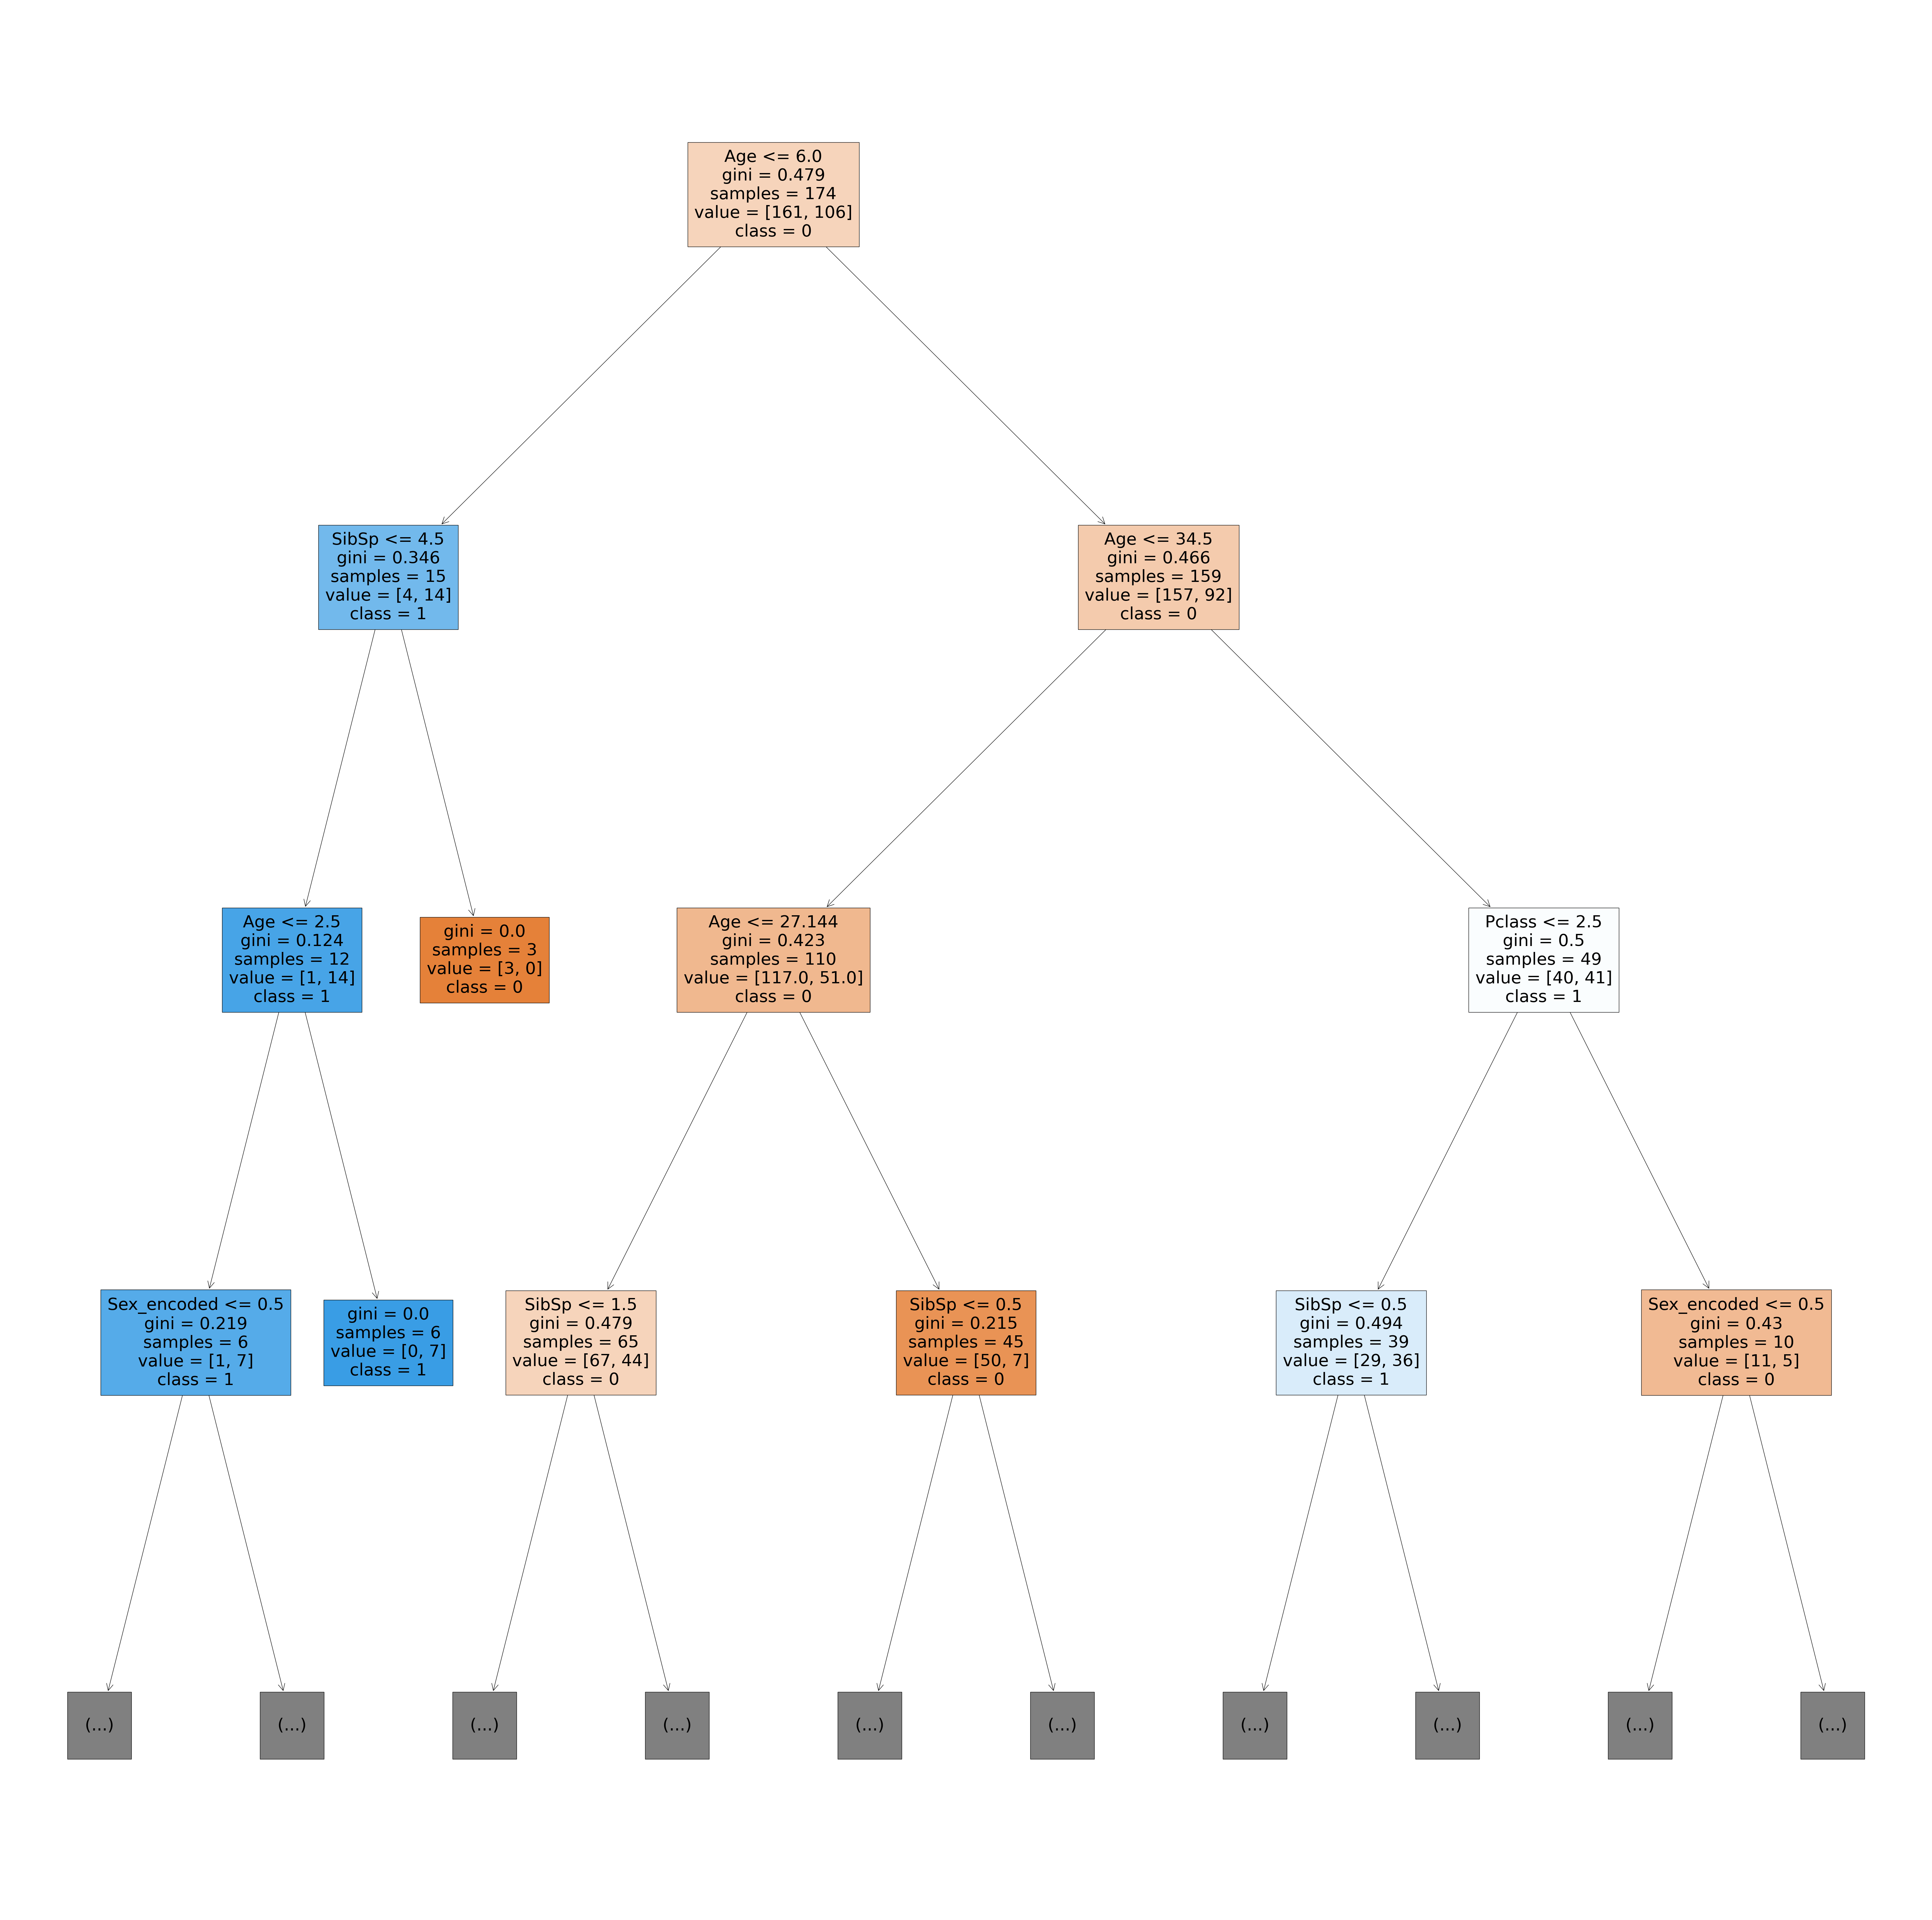

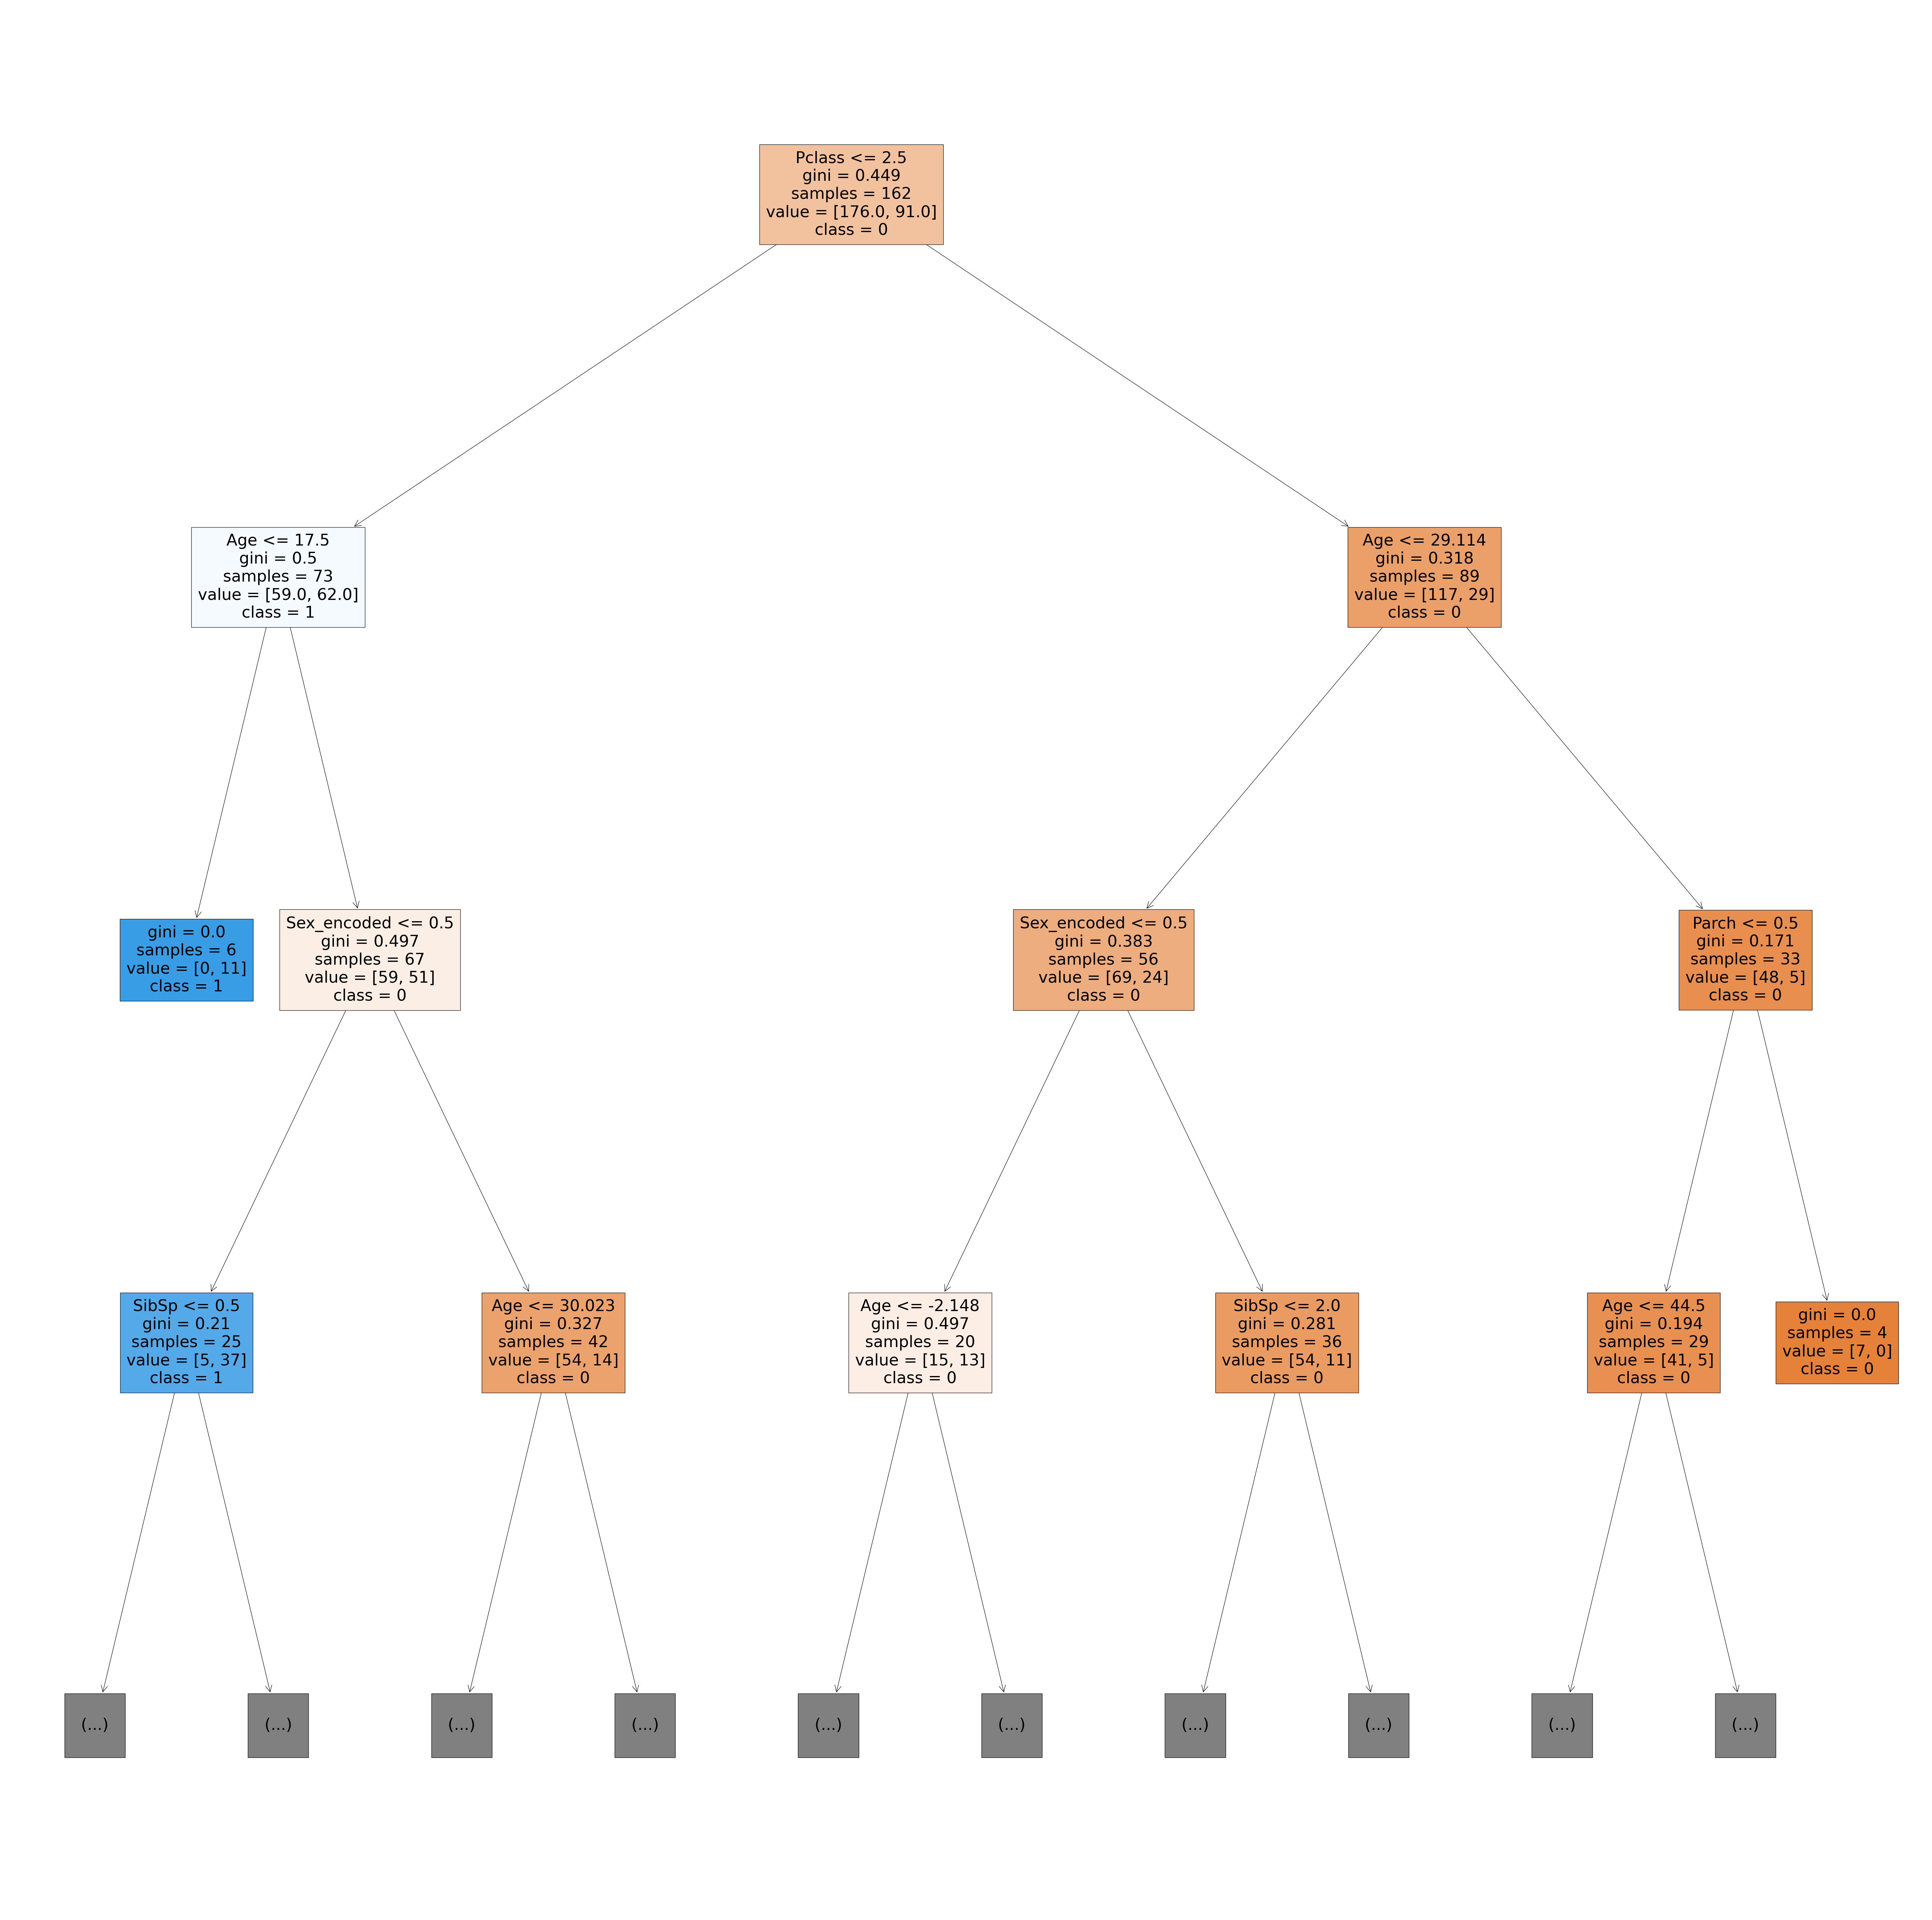

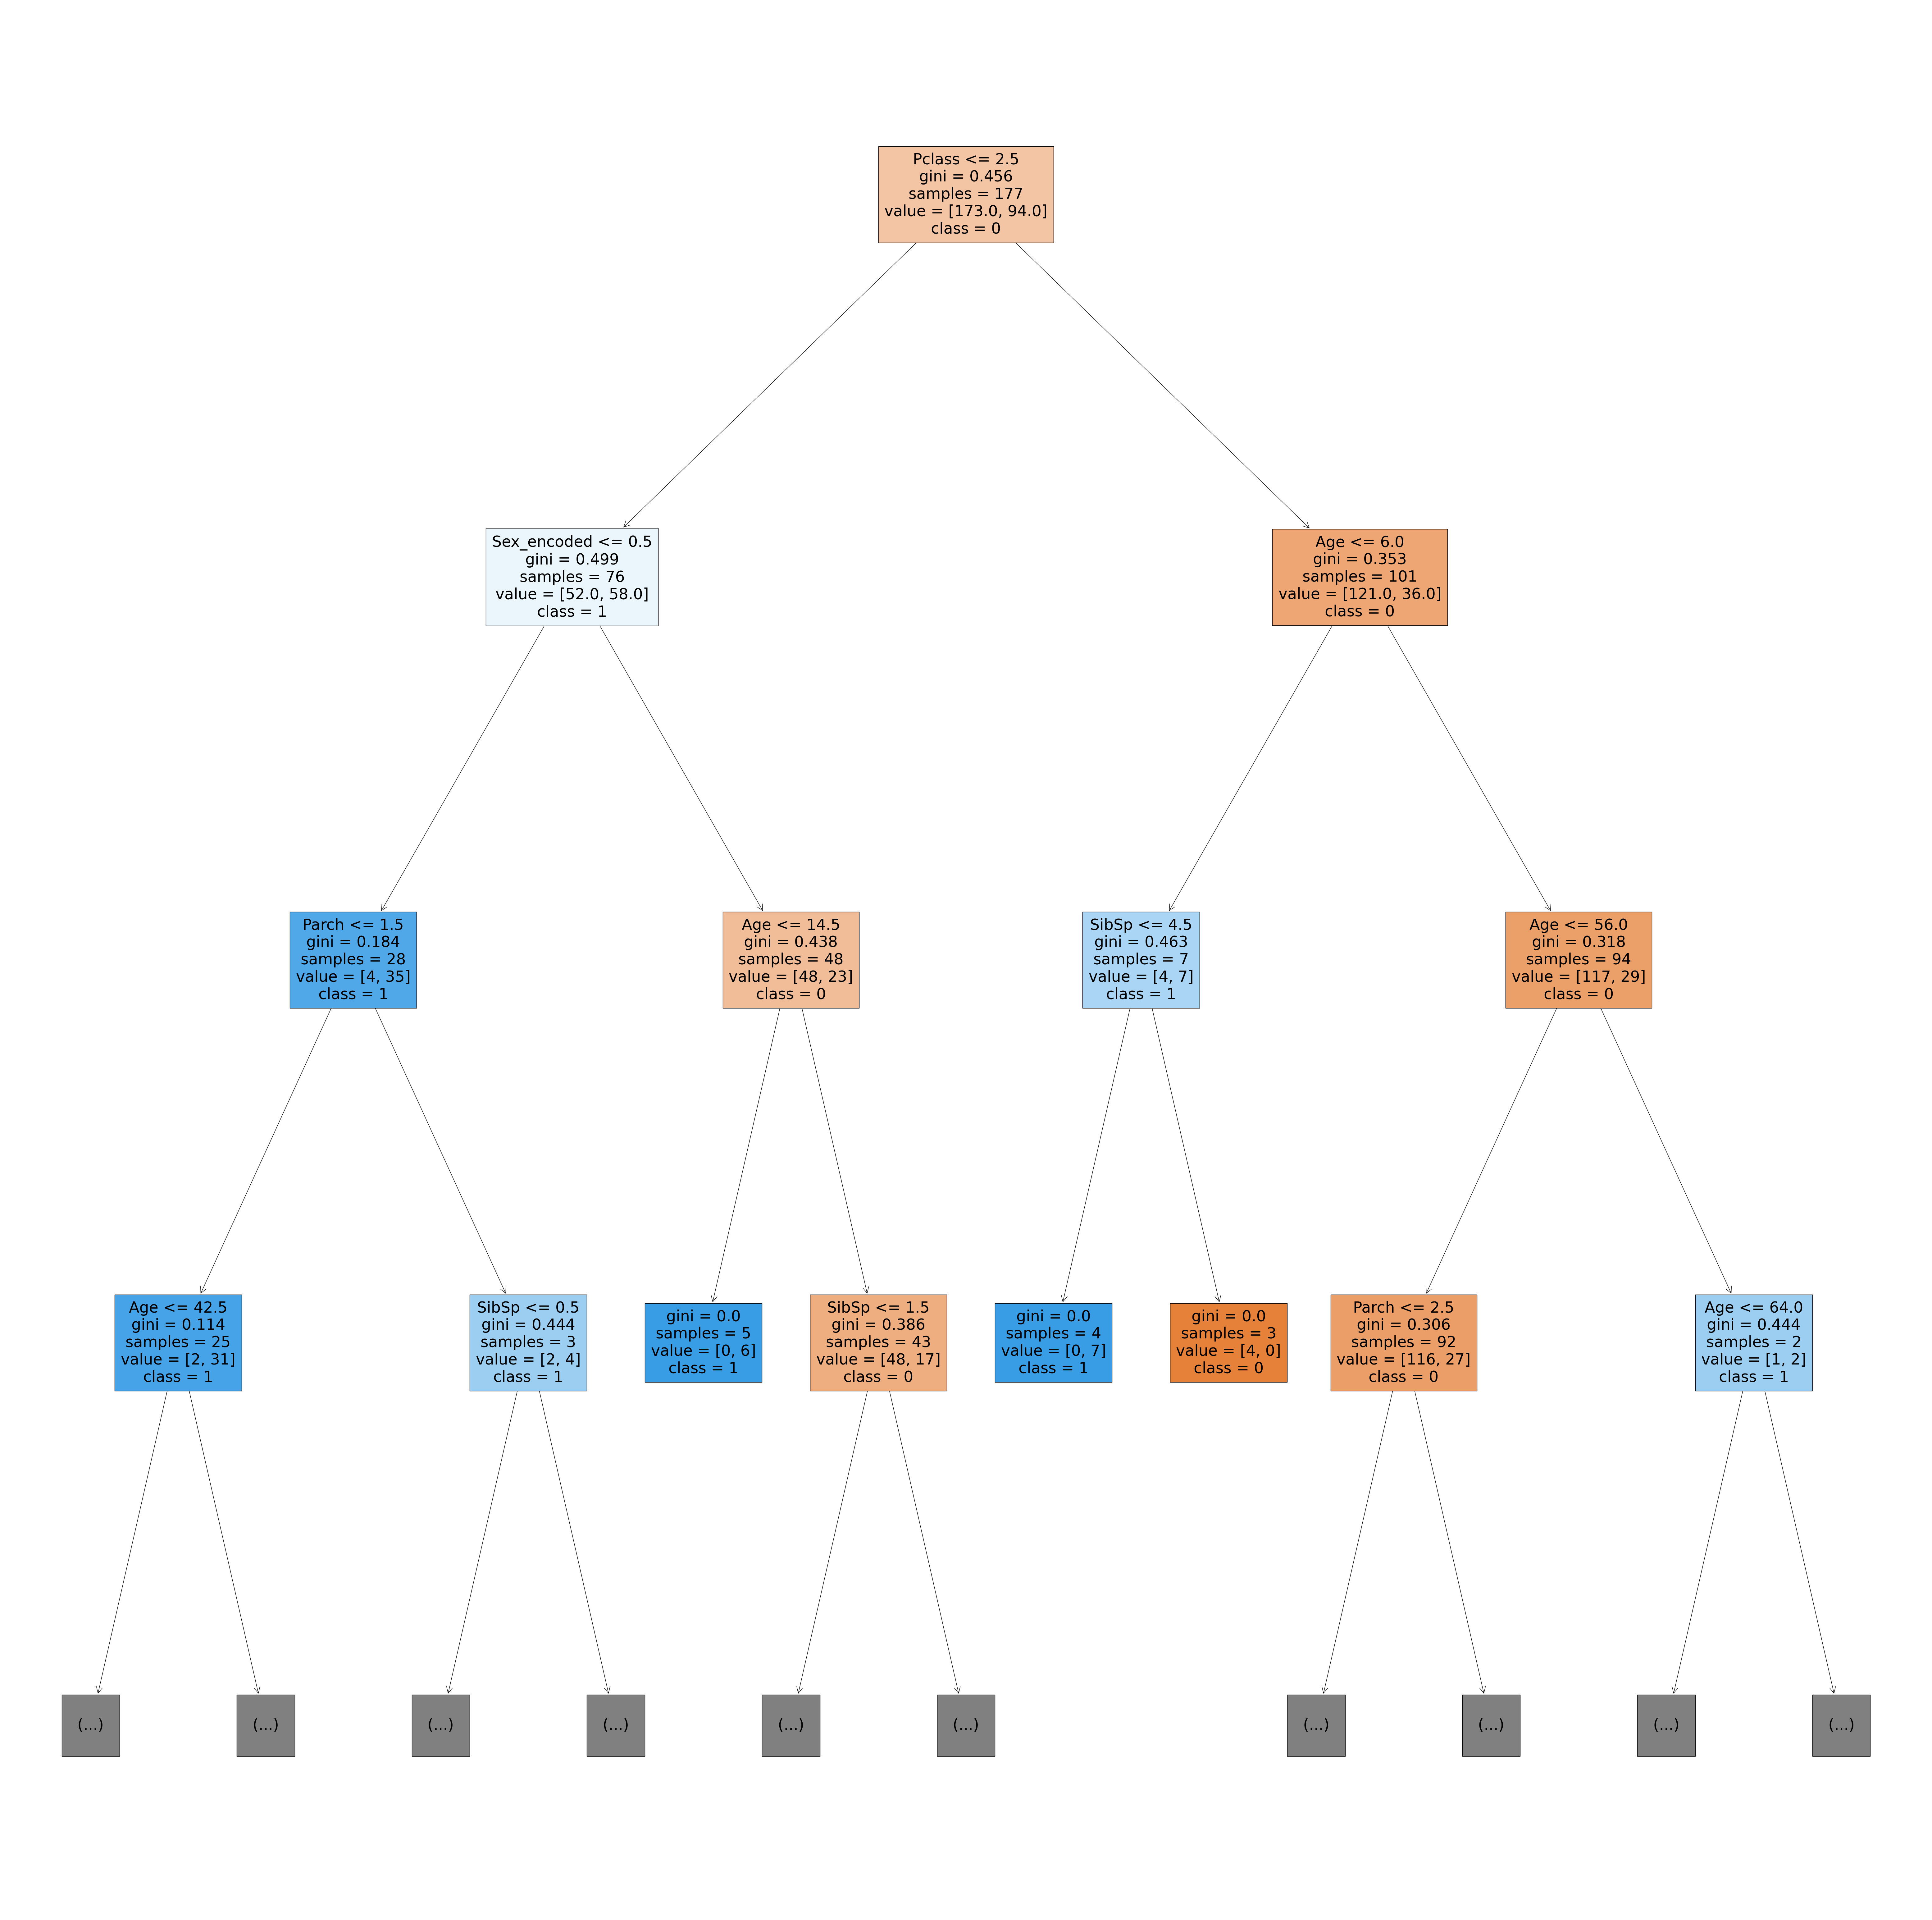

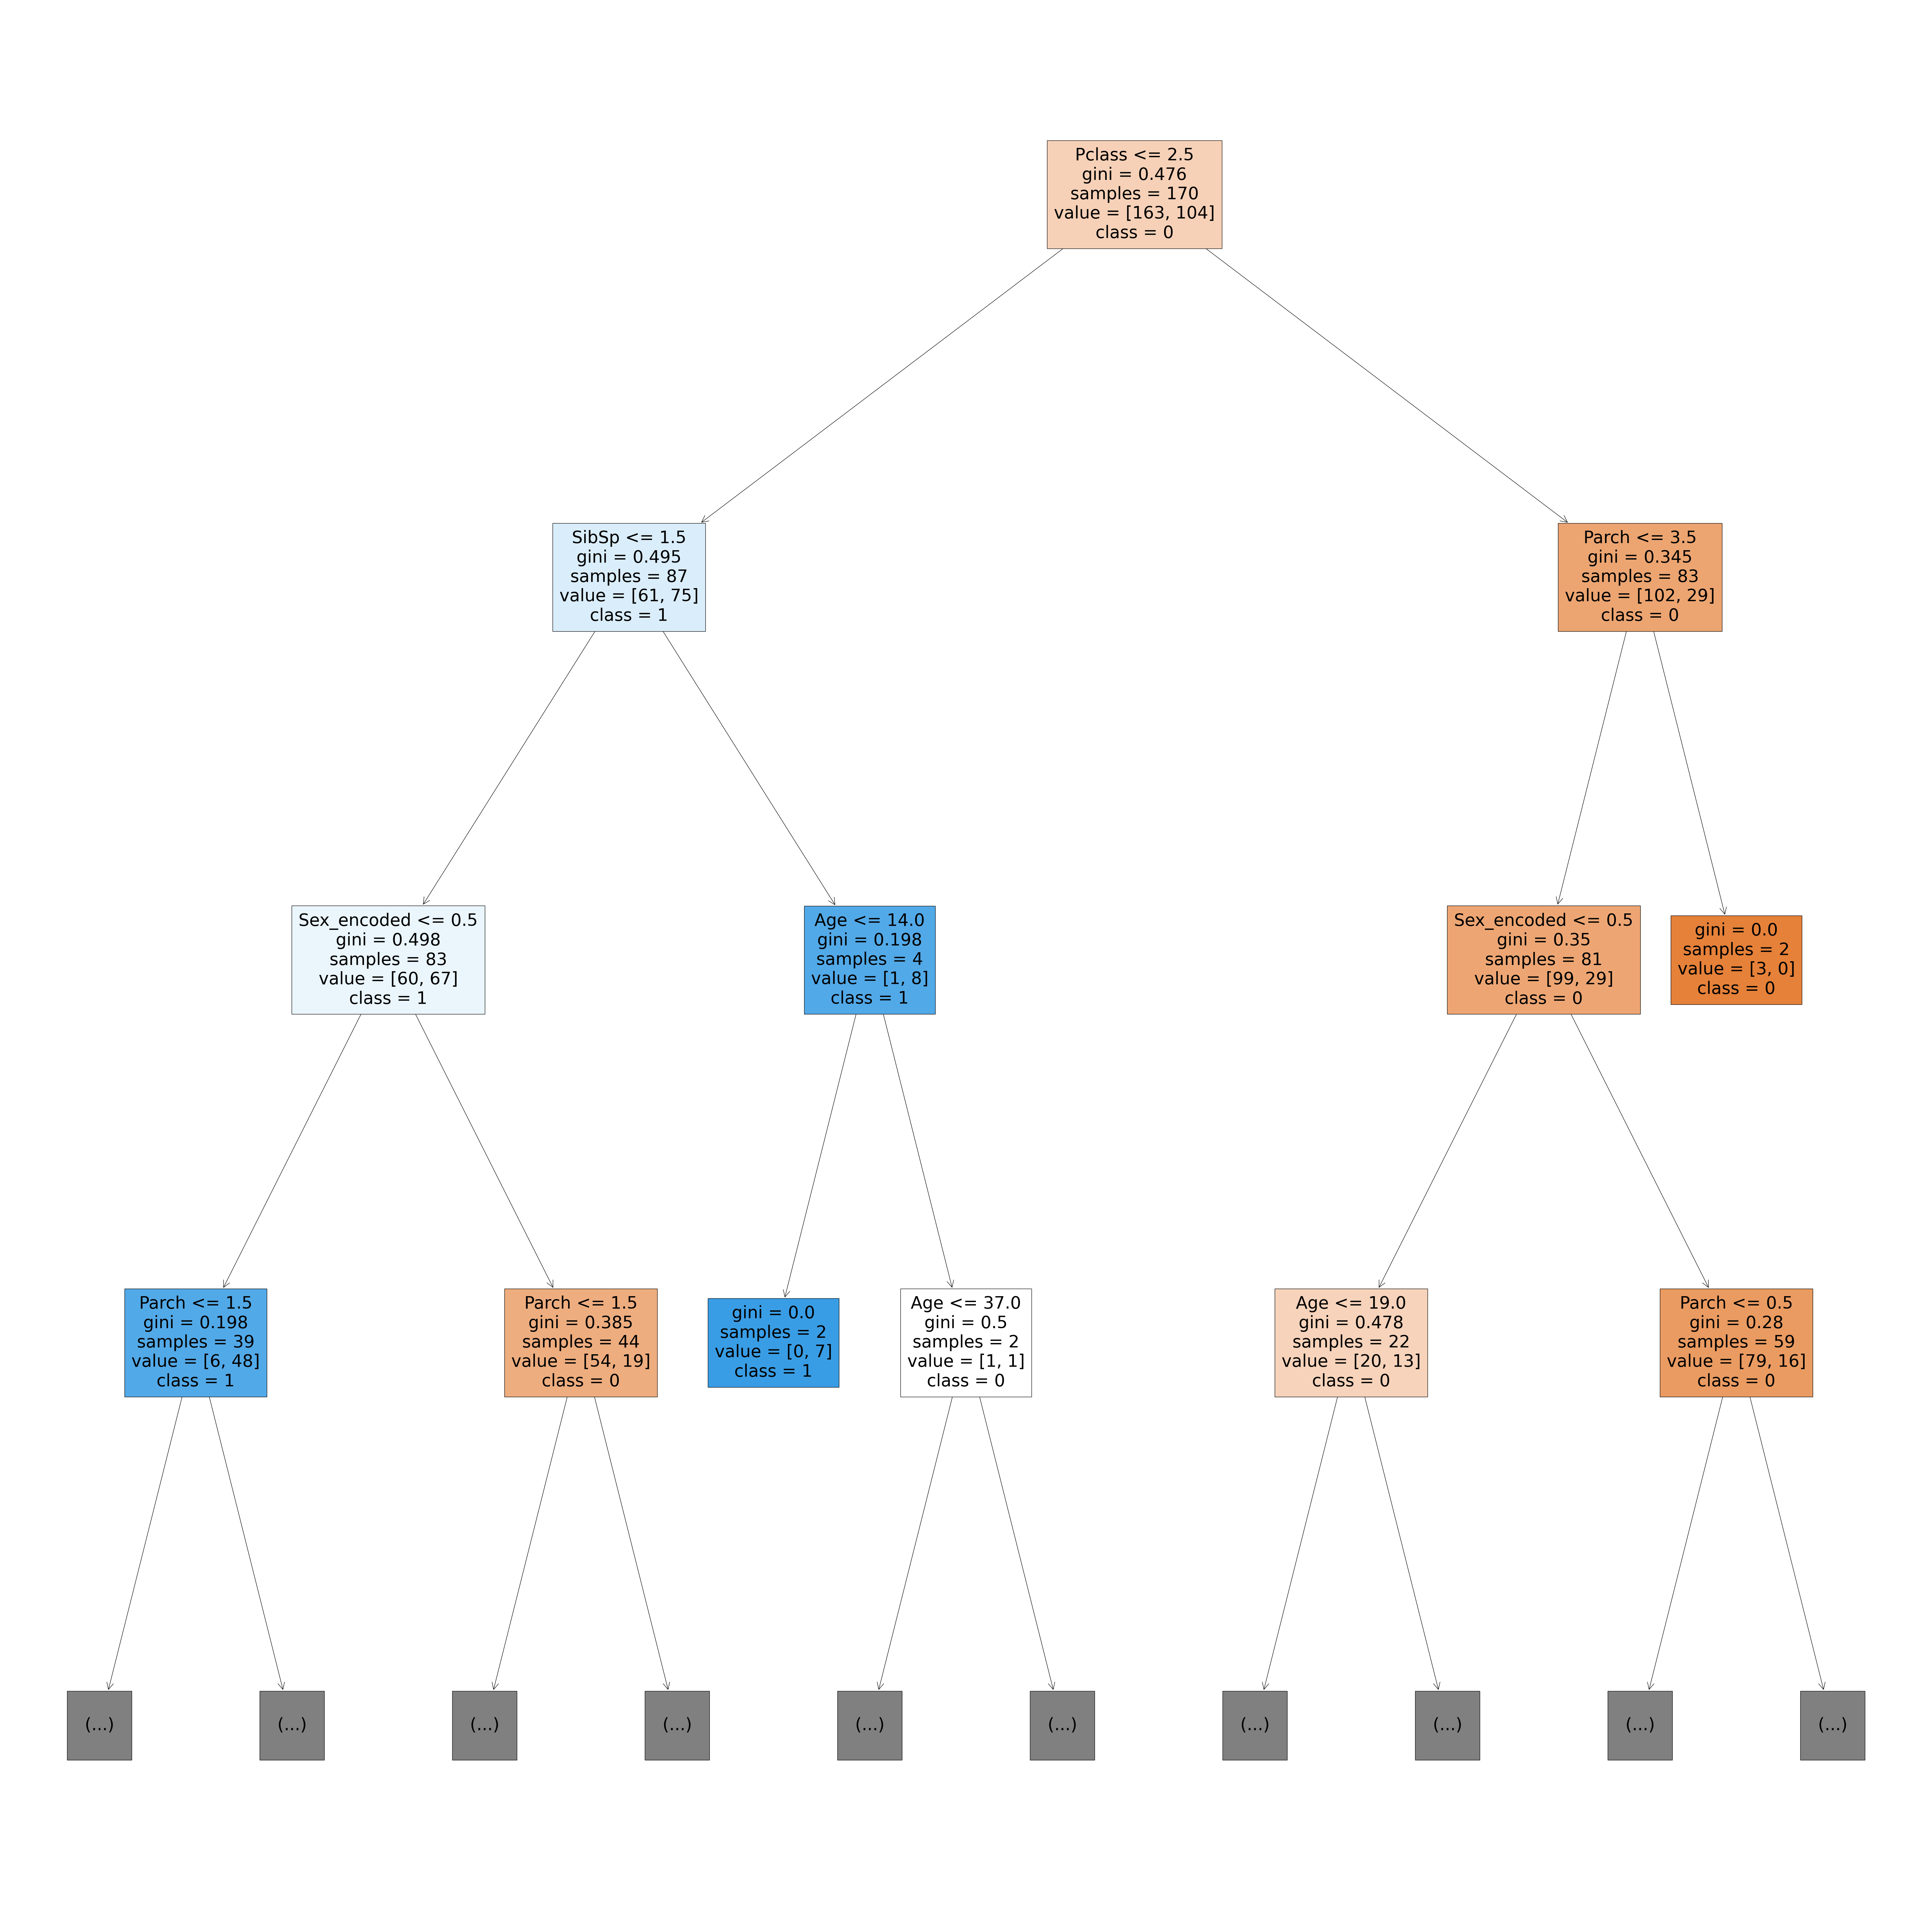

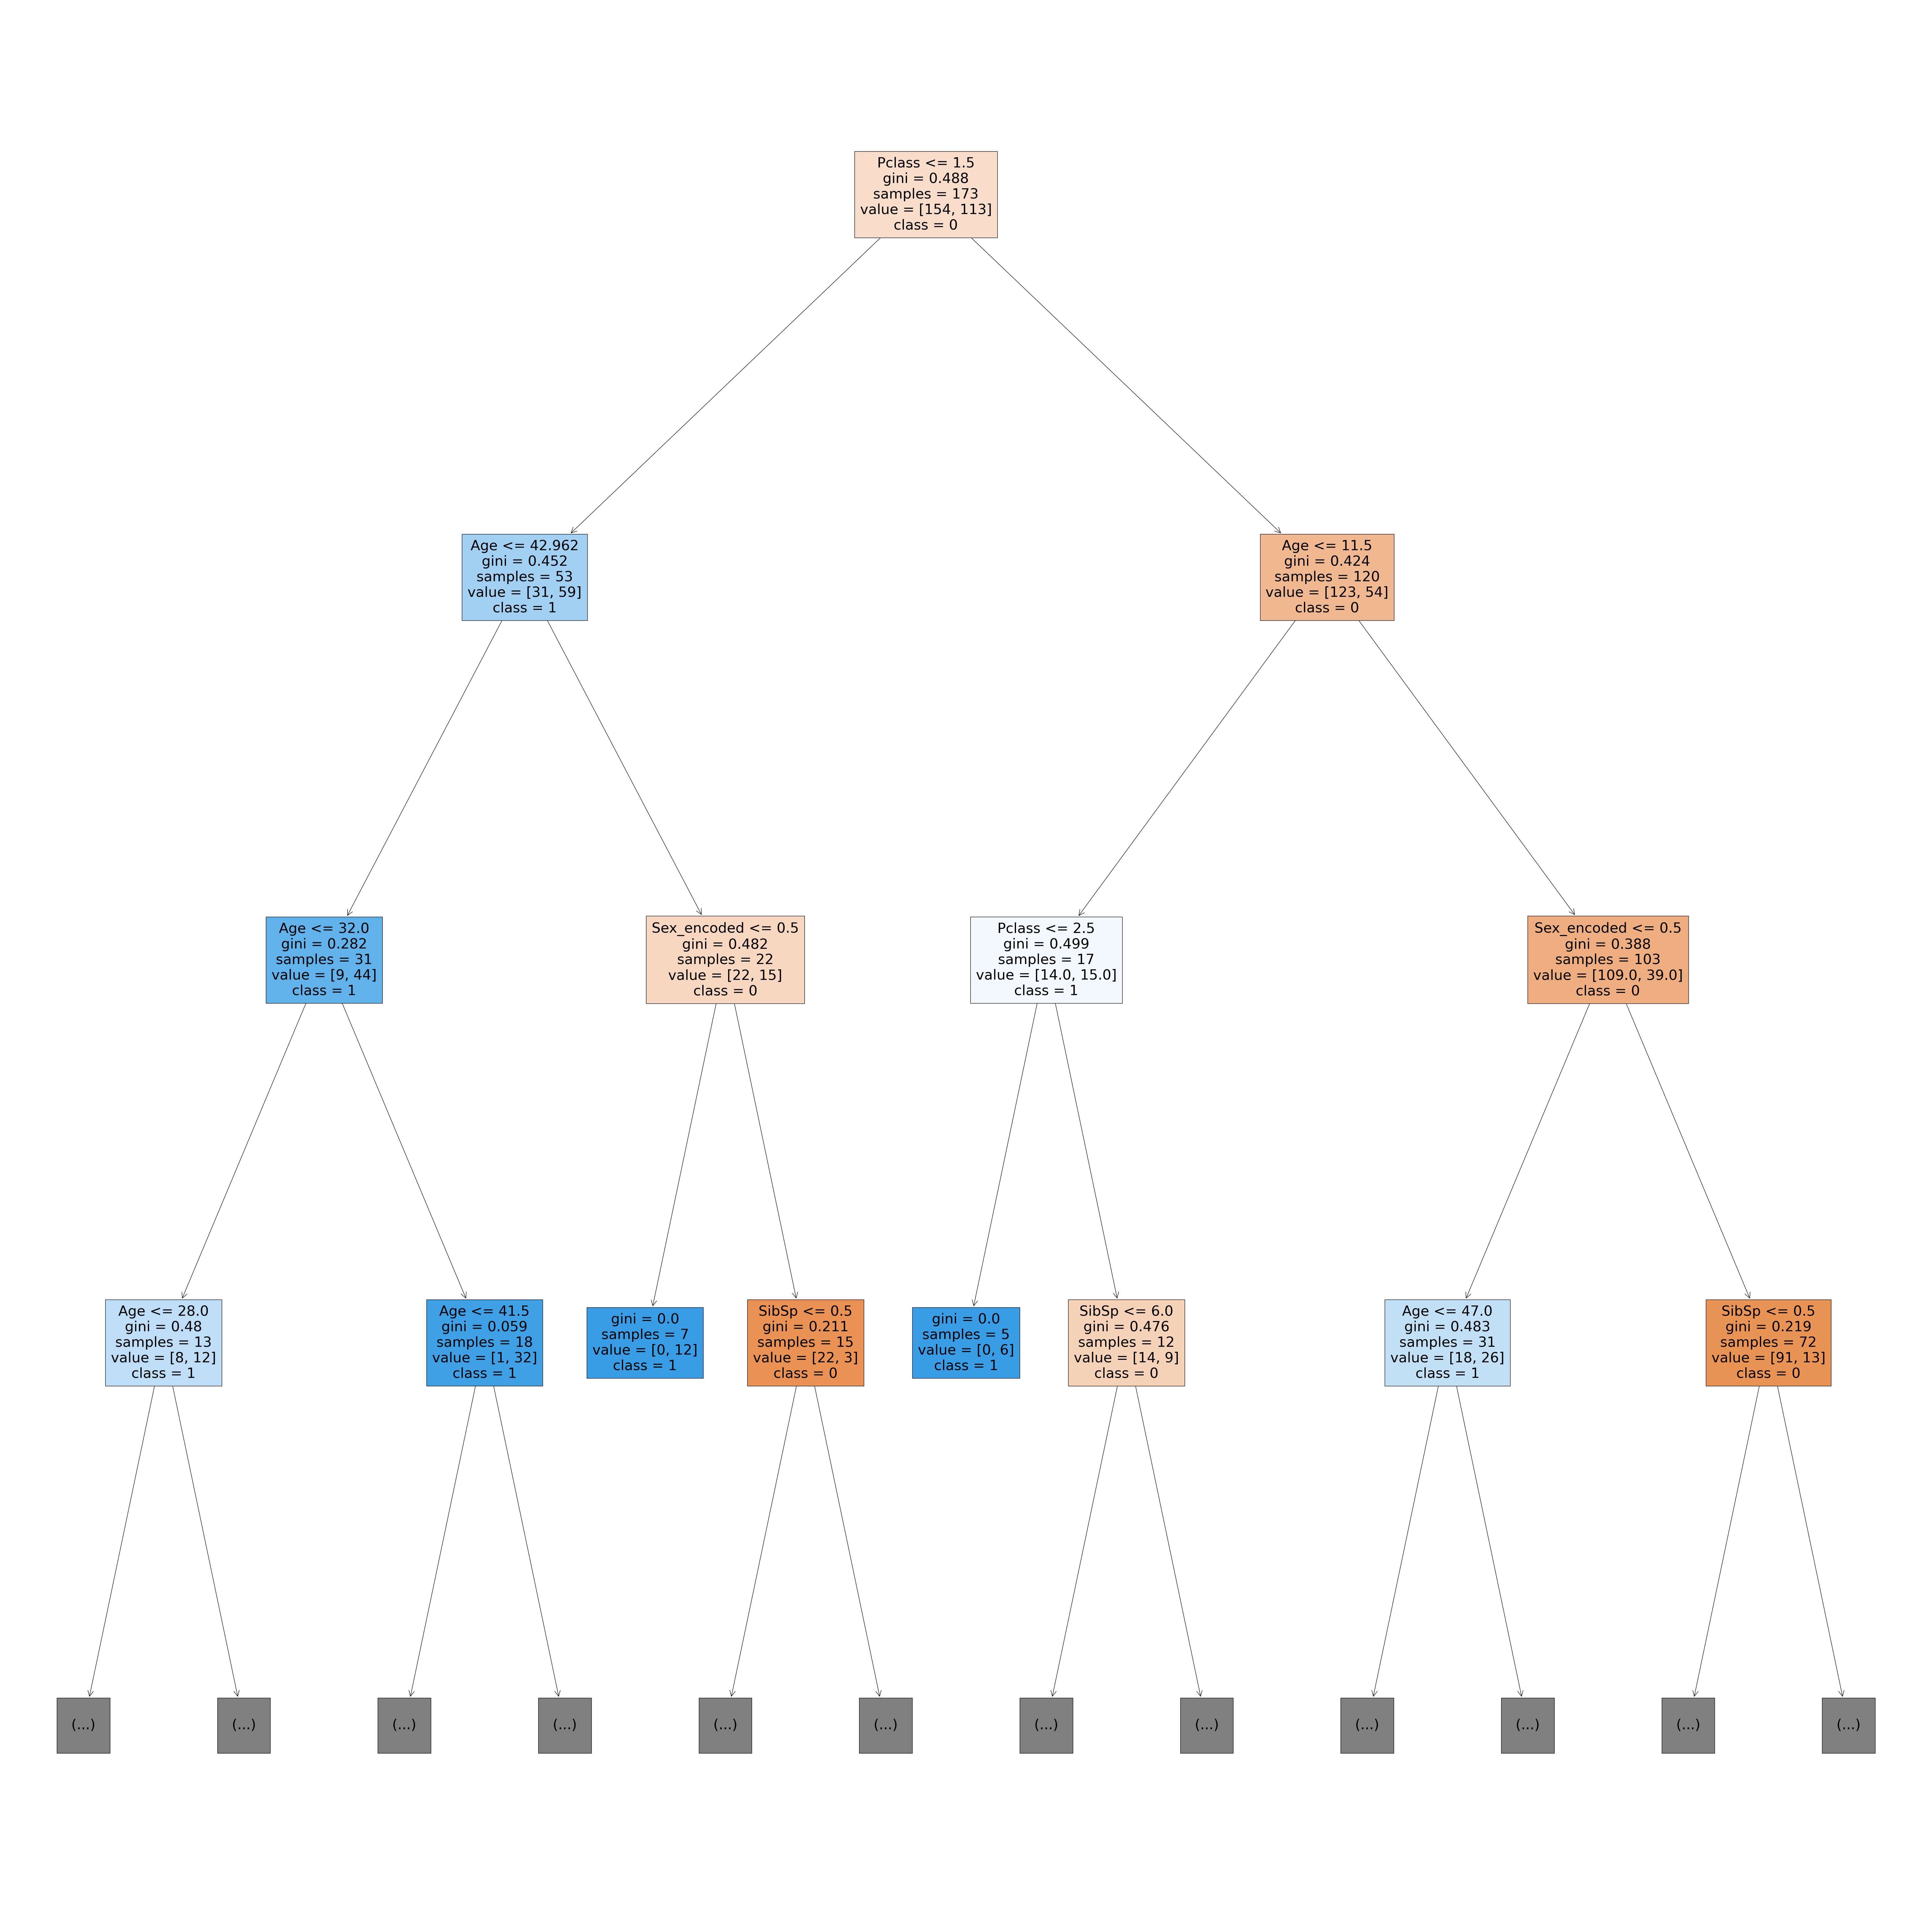

In [17]:
# Draw first 3 decision trees in the random forest
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

for i in range(5):
    tree = rf.estimators_[i]
    plt.figure(figsize=(80,80))
    plot_tree(
        tree,
        feature_names=X.columns,
        class_names=[str(x) for x in y.unique()],
        filled=True,
        max_depth=3
        )
    plt.show()

In [18]:
# Hyperparameter finetuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parameters =  {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20)
    }

random_search = RandomizedSearchCV(
    rf,
    param_distributions=parameters,
    n_iter=10,
    cv=5
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

random_search.best_params_



{'max_depth': 17, 'n_estimators': 188}

In [19]:
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8157051282051282